In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")
test = pd.read_csv("/kaggle/input/credit-score-classification/test.csv")

/tmp/ipykernel_19/2755533331.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")


In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

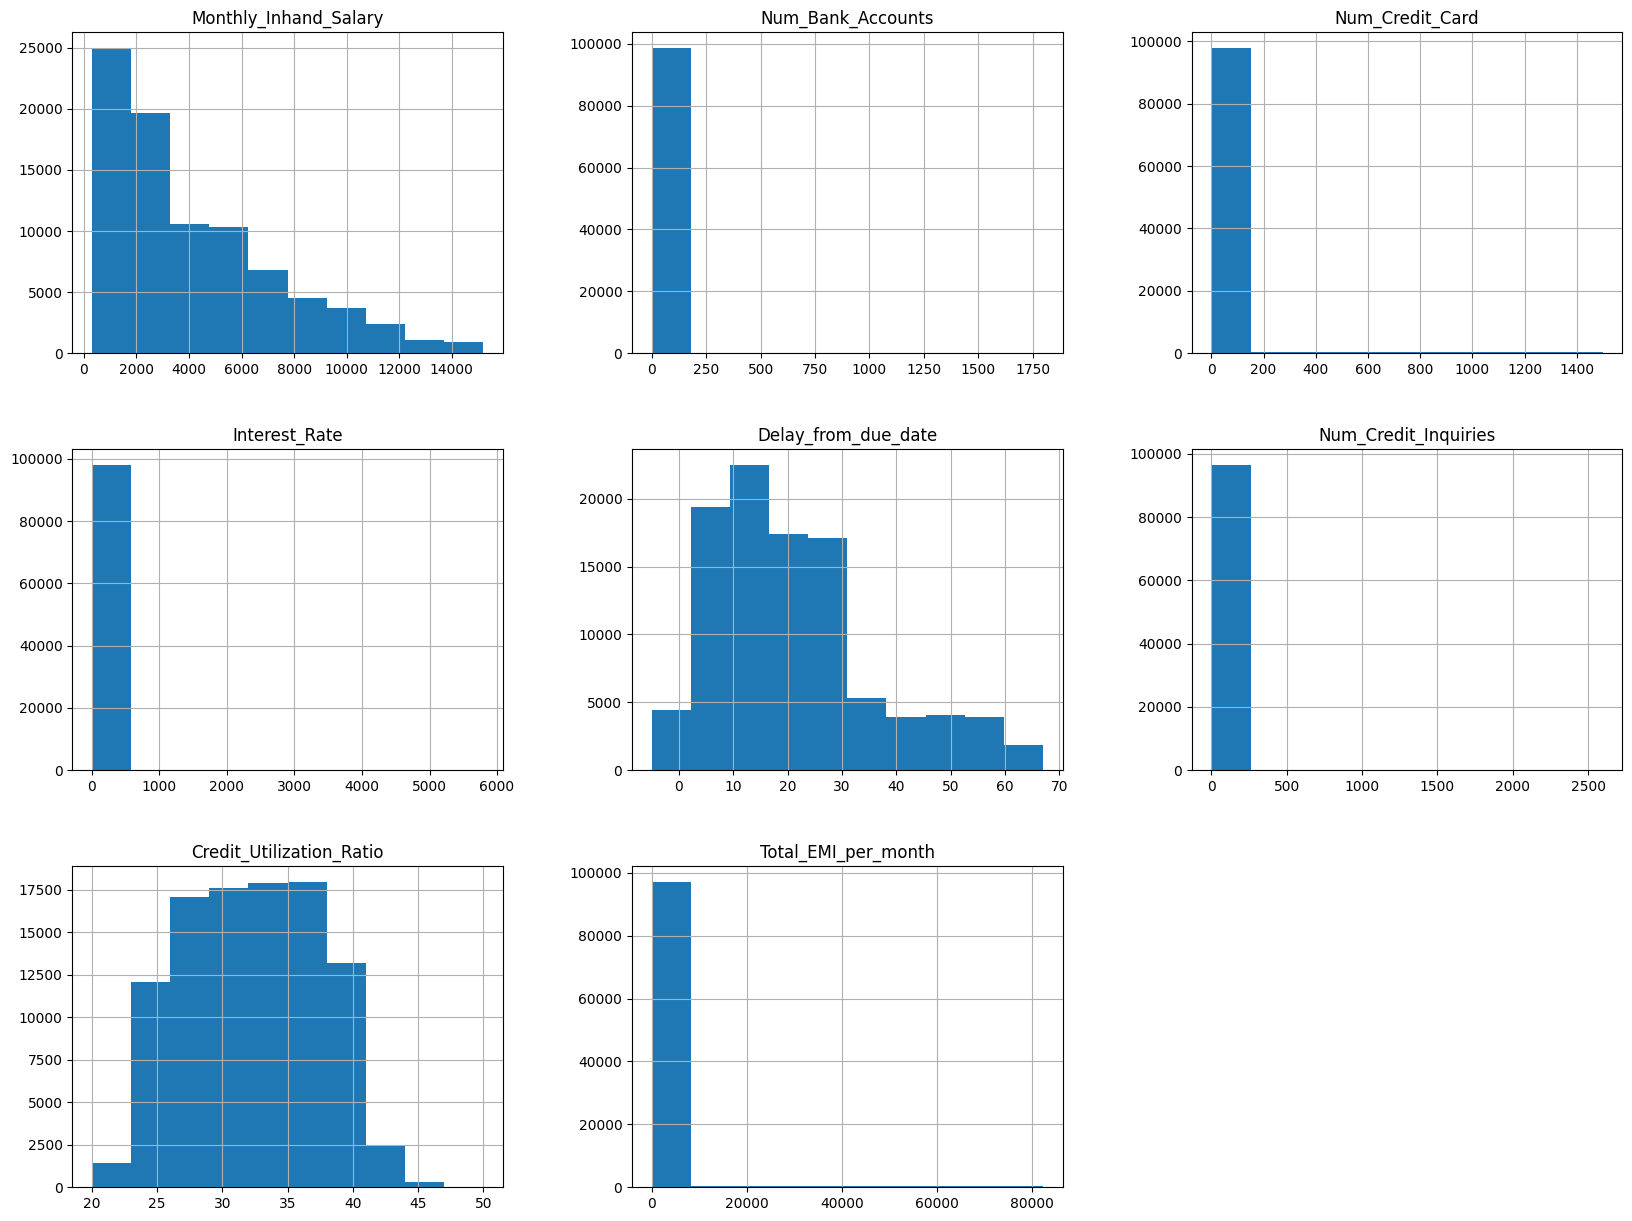

In [8]:
train.hist(figsize=(20, 15))
plt.show()

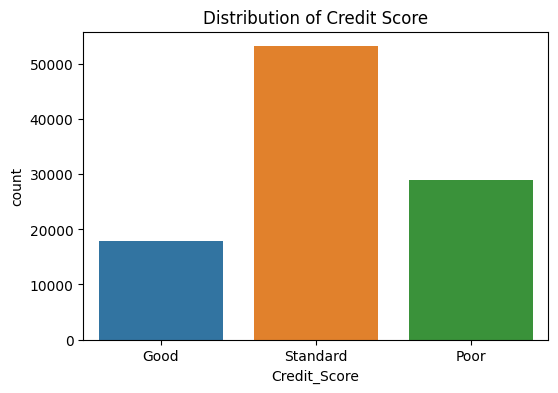

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Credit_Score')
plt.title('Distribution of Credit Score')
plt.show()

In [10]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [11]:
train.shape

(100000, 28)

In [12]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

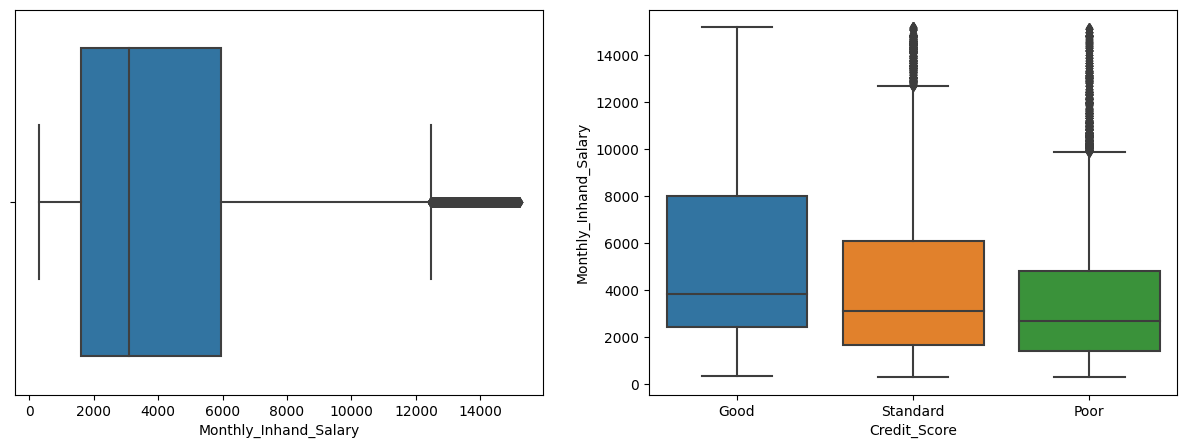

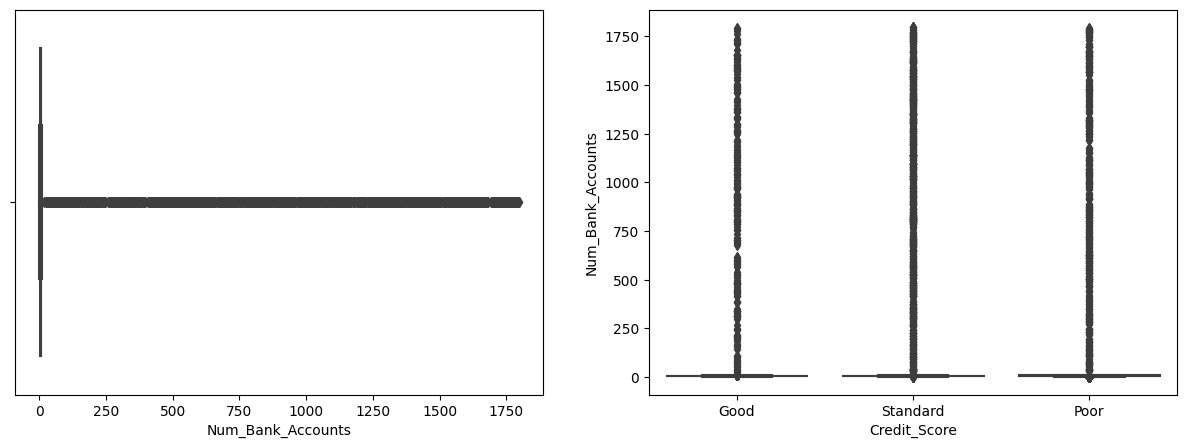

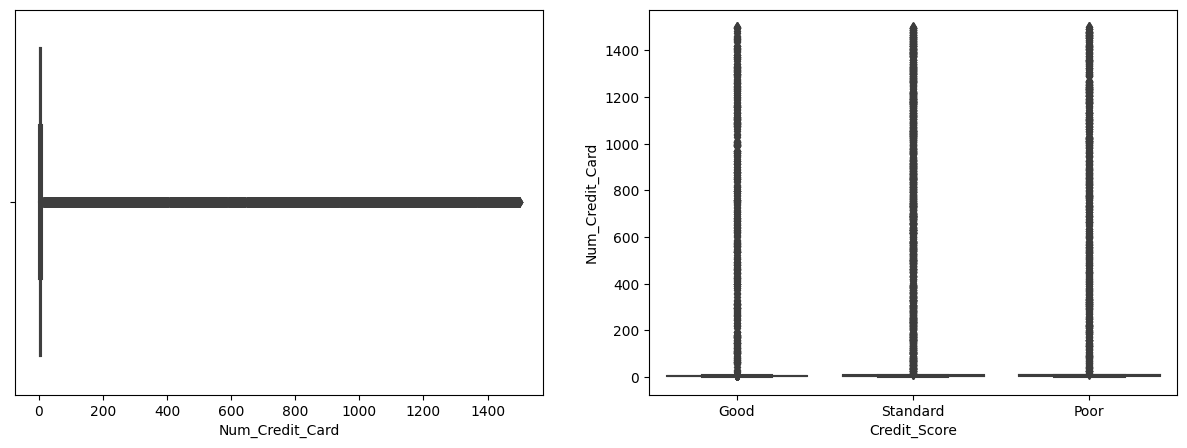

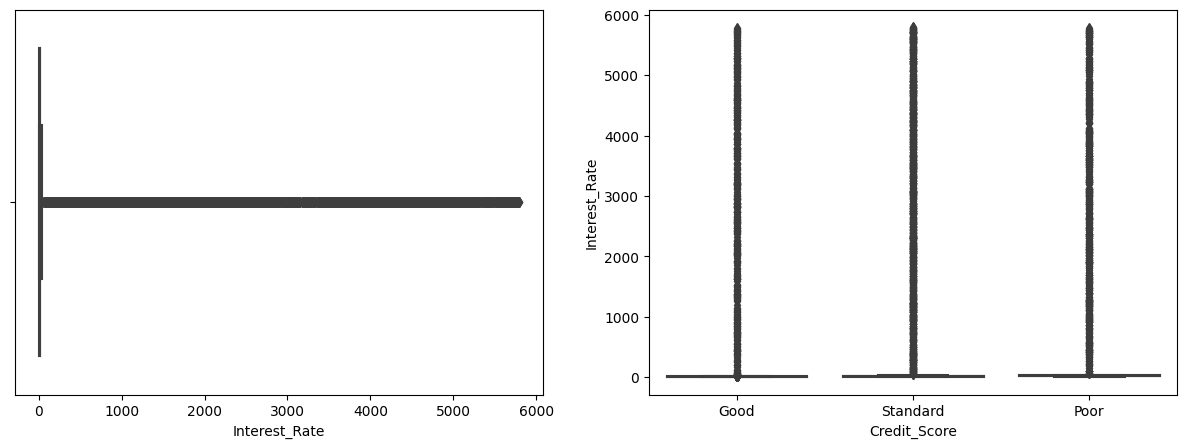

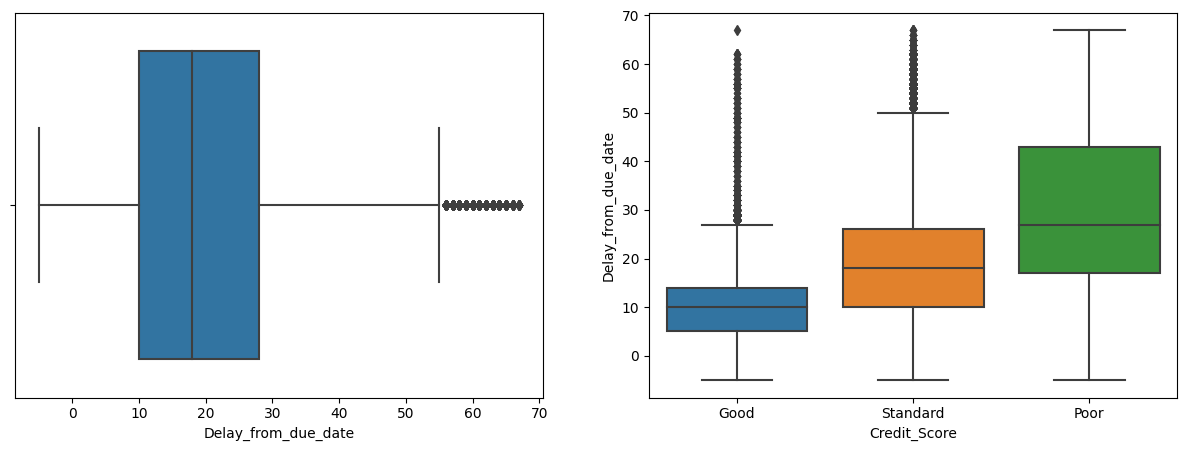

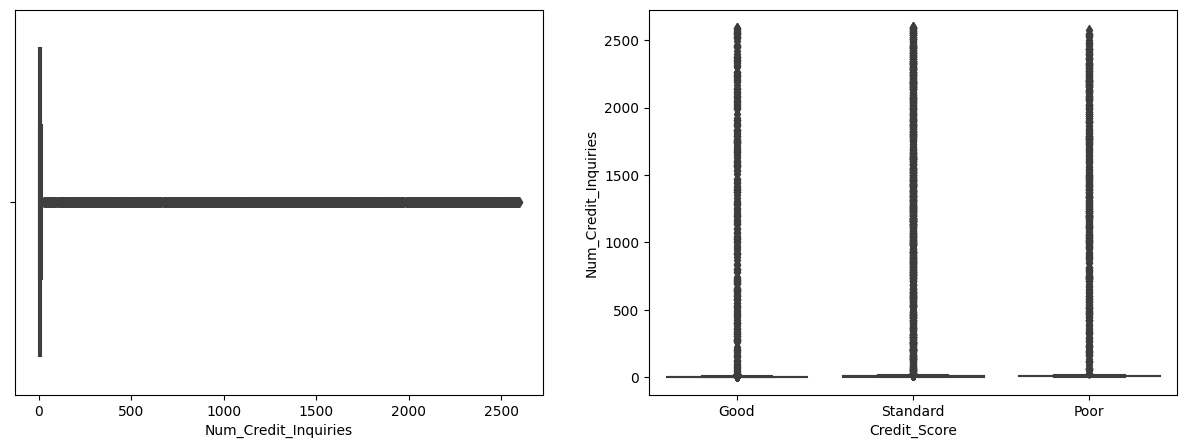

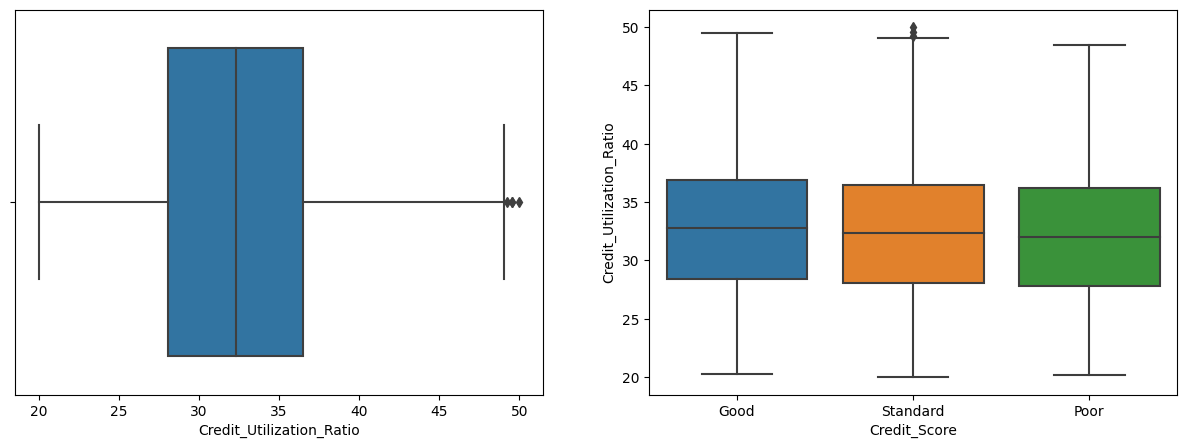

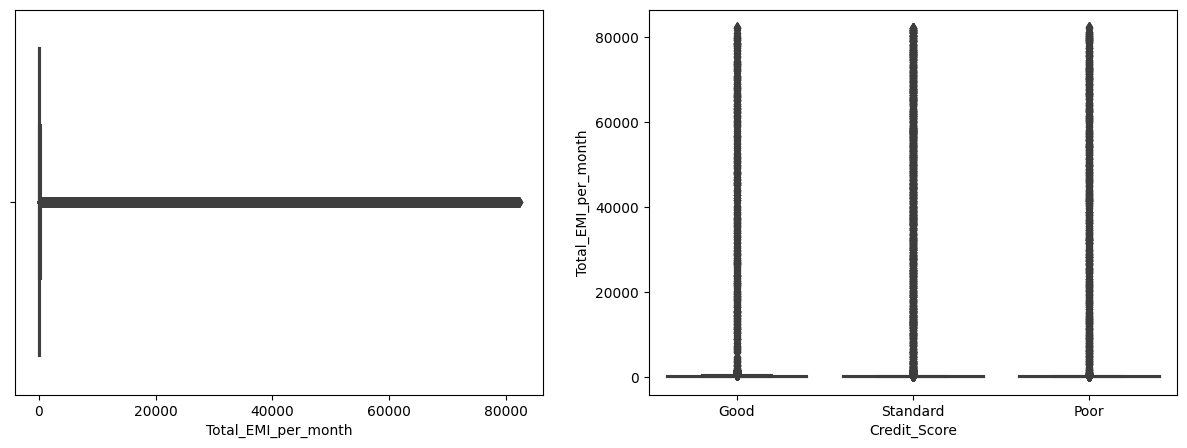

In [14]:
for col in train.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =train)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =train)
    plt.show()

In [15]:
columns=[
      'Credit_Score']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [16]:
train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

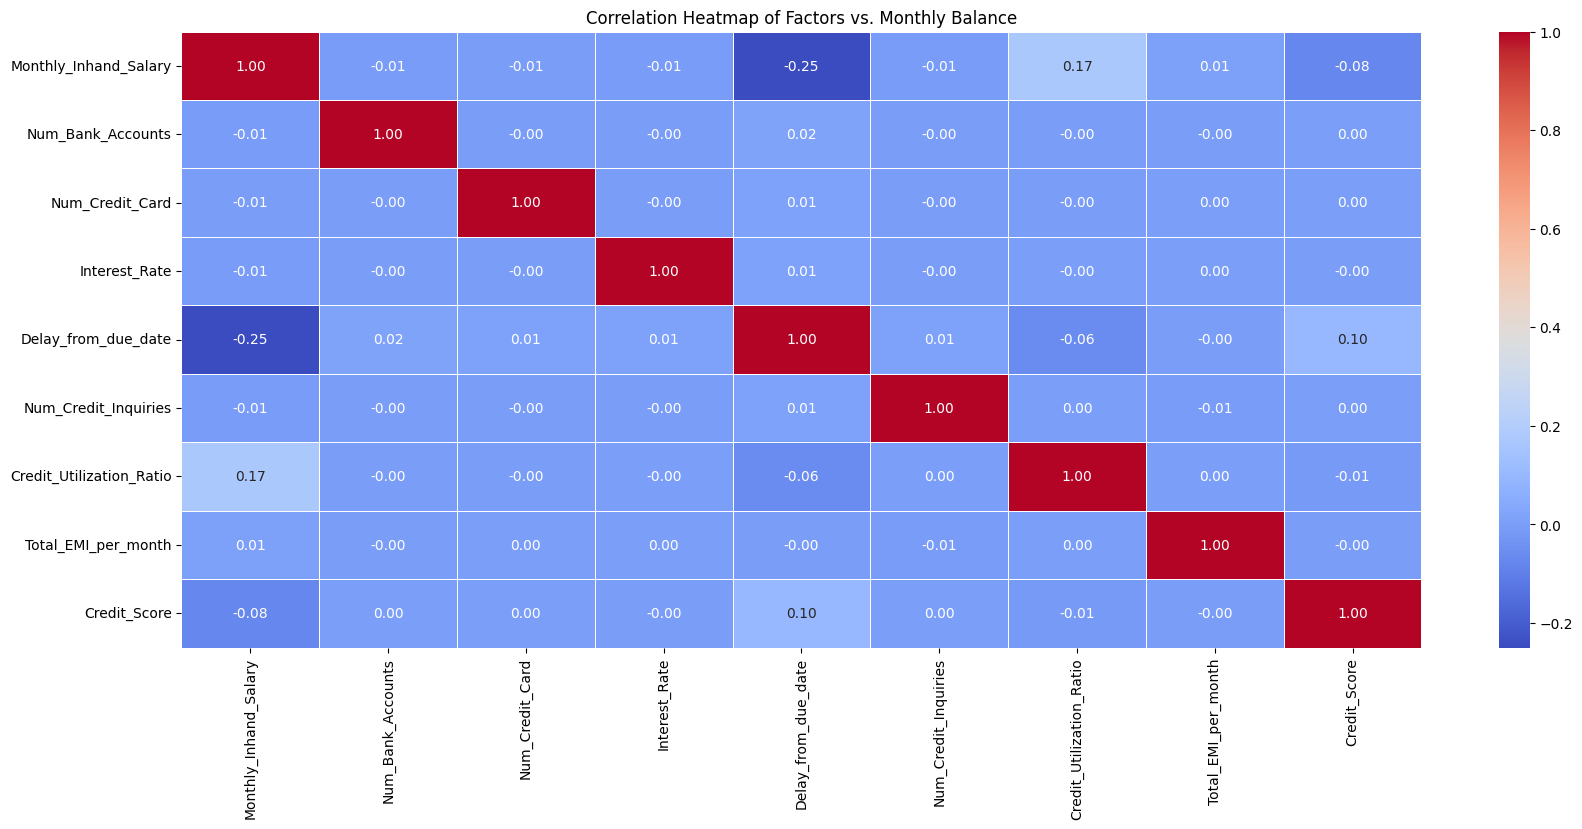

In [17]:
selected_columns = train.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

In [18]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    train[item] = ce.LeaveOneOutEncoder().fit_transform(train[item],train['Credit_Score'])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,1.350748,809.98,26.822620,22 Years and 1 Months,1.099647,49.574949,80.41529543900253,1.354970,312.49408867943663,0
1,0x1603,CUS_0xd40,February,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.944960,NaN,1.099647,49.574949,118.28022162236736,1.358308,284.62916249607184,0
2,0x1604,CUS_0xd40,March,0.0,-500,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,28.609352,22 Years and 3 Months,1.099647,49.574949,81.699521264648,1.338167,331.2098628537912,0
3,0x1605,CUS_0xd40,April,0.0,23,821-00-0265,1.337409,19114.12,NaN,3,...,0.865508,809.98,31.377862,22 Years and 4 Months,1.099647,49.574949,199.4580743910713,1.385818,223.45130972736786,0
4,0x1606,CUS_0xd40,May,0.0,23,821-00-0265,1.337409,19114.12,1824.843333,3,...,0.865508,809.98,24.797347,22 Years and 5 Months,1.099647,49.574949,41.420153086217326,1.345174,341.48923103222177,0


In [19]:
train[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1.099647,1.354970,0.000000,1.337409,1.350748
1,1.099647,1.358308,0.000000,1.337409,0.865508
2,1.099647,1.338167,0.000000,1.337409,0.865508
3,1.099647,1.385818,0.000000,1.337409,0.865508
4,1.099647,1.345174,0.000000,1.337409,0.865508
...,...,...,...,...,...
99995,1.099619,1.320554,1.285714,1.373132,1.350698
99996,1.099619,1.345117,1.285714,1.373132,1.350698
99997,1.099619,1.320554,1.285714,1.373132,0.865467
99998,1.099591,1.358116,1.142857,1.372973,0.865426


In [20]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                        float64
Age                          object
SSN                          object
Occupation                  float64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance              object
Credit_Score                

In [21]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = train.groupby([item])['Credit_Score'].mean()
    train[item] = train[item].map(mean_encoding)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,1.350748,0.25,26.822620,1.284314,1.099647,0.25,80.41529543900253,1.354970,0.0,0
1,0x1603,CUS_0xd40,February,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.944960,NaN,1.099647,0.25,118.28022162236736,1.358308,0.0,0
2,0x1604,CUS_0xd40,March,0.0,1.319413,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,28.609352,1.219008,1.099647,0.25,81.699521264648,1.338167,0.0,0
3,0x1605,CUS_0xd40,April,0.0,1.383130,821-00-0265,1.337409,0.25,NaN,3,...,0.865508,0.25,31.377862,1.243902,1.099647,0.25,199.4580743910713,1.385818,0.0,0
4,0x1606,CUS_0xd40,May,0.0,1.383130,821-00-0265,1.337409,0.25,1824.843333,3,...,0.865508,0.25,24.797347,1.212245,1.099647,0.25,41.420153086217326,1.345174,0.0,0


In [22]:
train.drop('Type_of_Loan',axis=1,inplace=True)

In [23]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                        float64
Age                         float64
SSN                          object
Occupation                  float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [24]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly']
train.drop(columns=columns_to_drop, inplace=True)

In [25]:
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [26]:
columns3 =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in columns3:
    train.drop(item,axis=1,inplace=True)
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [27]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [29]:
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [30]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

train_predictions = logistic_model.predict(X_train_imputed)
test_predictions = logistic_model.predict(X_test_imputed)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Testing Accuracy:", test_accuracy)

Logistic Regression Training Accuracy: 0.8506268656716418
Logistic Regression Testing Accuracy: 0.8524545454545455


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_imputed, y_train)

ridge_train_predictions = ridge_model.predict(X_train_imputed)
ridge_test_predictions = ridge_model.predict(X_test_imputed)

ridge_train_accuracy = accuracy_score(ridge_train_predictions, y_train)
ridge_test_accuracy = accuracy_score(ridge_test_predictions, y_test)


print("RidgeClassifier Training Accuracy:", ridge_train_accuracy)
print("RidgeClassifier Test Accuracy:", ridge_test_accuracy)

RidgeClassifier Training Accuracy: 0.9275223880597014
RidgeClassifier Test Accuracy: 0.9278787878787879


In [32]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

knn_train_predictions = knn_model.predict(X_train_imputed)
knn_test_predictions = knn_model.predict(X_test_imputed)

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, y_test)

print("KNeighborsClassifier Training Accuracy:", knn_train_accuracy)
print("KNeighborsClassifier Test Accuracy:", knn_test_accuracy)

KNeighborsClassifier Training Accuracy: 0.8309402985074626
KNeighborsClassifier Test Accuracy: 0.7183939393939394


In [33]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train)

dt_train_predictions = dt_model.predict(X_train_imputed)
dt_test_predictions = dt_model.predict(X_test_imputed)

dt_train_accuracy = accuracy_score(dt_train_predictions, y_train)
dt_test_accuracy = accuracy_score(dt_test_predictions, y_test)

print("DecisionTreeClassifier Training Accuracy:", dt_train_accuracy)
print("DecisionTreeClassifier Test Accuracy:", dt_test_accuracy)

DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Test Accuracy: 0.9994848484848485


In [34]:
svc_model = LinearSVC()
svc_model.fit(X_train_imputed, y_train)

svc_train_predictions = svc_model.predict(X_train_imputed)
svc_test_predictions = svc_model.predict(X_test_imputed)

svc_train_accuracy = accuracy_score(svc_train_predictions, y_train)
svc_test_accuracy = accuracy_score(svc_test_predictions, y_test)

print("LinearSVC Training Accuracy:", svc_train_accuracy)
print("LinearSVC Test Accuracy:", svc_test_accuracy)

LinearSVC Training Accuracy: 0.8679850746268657
LinearSVC Test Accuracy: 0.8681212121212121


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


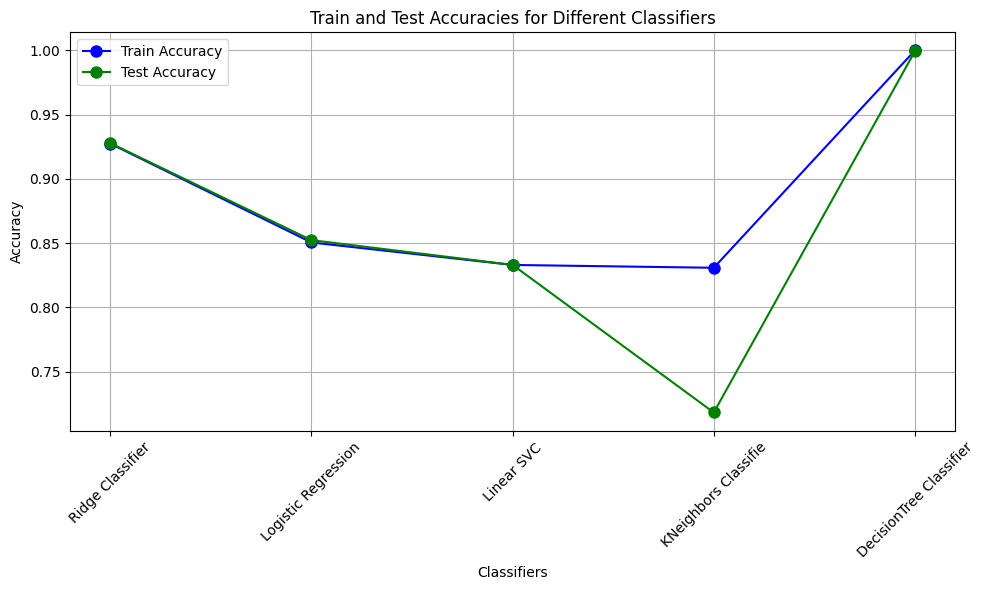

In [35]:
classifiers = ['Ridge Classifier', 'Logistic Regression', 'Linear SVC', 'KNeighbors Classifie', 'DecisionTree Classifier']
train_accuracies = [0.927522, 0.8506, 0.833104, 0.8309, 1.0]
test_accuracies = [0.927878, 0.8524, 0.833151, 0.7183, 0.9994]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(classifiers, train_accuracies, marker='o', label='Train Accuracy', linestyle='-', color='b', markersize=8)
plt.plot(classifiers, test_accuracies, marker='o', label='Test Accuracy', linestyle='-', color='g', markersize=8)

# Add labels and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Classifiers')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()